# DAML4 notes
## Week 5 - Linear regression
<hr style="border:2px solid black"> </hr>
Given a training set of $N$ data point-target pairs $\{\mathbf{x}^{(n)}, y^{(n)}\}_{n=0}^{N-1}$ where $\mathbf{x}\in \mathbb{R}^{D}$ and $y\in \mathbb{R}^{1}$ (for simplicity! We can have multidimensional outputs...) the goal in regression is to obtain some function $f$ such that $f(\mathbf{x}^{(n)}) = y^{(n)}$ for each training point.

We refer to this function as our model. As the name suggests, linear regression involves learning a linear model, and you saw in the lecture that we can represent different kinds of linear regression (e.g. simple, multiple, polynomial) in the same framework if we introduce a feature transformation $\phi$ that maps $\mathbf{x}$ to a feature vector $\phi({\mathbf{x}})\in\mathbb{R}^{Z}$. This lets us write our model as


$$f(\mathbf{x}) =  \mathbf{w}^\top \phi({\mathbf{x}})$$

where $\mathbf{w}\in \mathbb{R}^{Z}$ is a vector of learnable weights. The model is linear in terms of its weights, even if the feature transformation is non-linear. $f(\mathbf{x})\in \mathbb{R}^{1}$ is the model's prediction of $y$. The above construction assumes that $\phi({\mathbf{x}})$ includes a constant term so that the bias is included implicitly in $\mathbf{w}$.



### Linear regression (unregularised)

In most cases it isn't possible to have $f(\mathbf{x}^{(n)}) = y^{(n)}$ for each training point, so we can relax the objective by instead trying to minimise the total (squared) distance between each target and prediction

$$L_{SE}(\mathbf{w}) = \sum_n (y^{(n)} - {\mathbf{w}^\top \phi (\mathbf{x}^{(n)}}))^2$$


with respect to $\mathbf{w}$. Mathematically, we want to solve $\underset{\mathbf{w}}{\textrm{minimise }}$$L_{SE}(\mathbf{w}) $. Technically $L_{SE}$ it is also a function of the data, but we are assuming this is fixed.


Recall that this function is convex, so it only has one extremum which is a minimum.

In the lecture, we saw that we could rewrite this loss as a vector norm:

$$L_{SE}(\mathbf{w}) =\lVert \mathbf{y}-\mathbf{\mathbf{\Phi}\mathbf{w}}\rVert^2$$

where 

$$\mathbf{y} =
\begin{bmatrix}
y^{(0)} \\
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(N-1)} \\
\end{bmatrix}\qquad\qquad
\mathbf{\Phi} =
\begin{bmatrix}
\phi(\mathbf{x}^{(0)} )^\top \\
\phi(\mathbf{x}^{(1)} )^\top \\
\phi(\mathbf{x}^{(2)} )^\top \\
\vdots \\
\phi(\mathbf{x}^{(N-1)})^\top  )
\end{bmatrix}$$



Through some vector calculus, we showed that the optimal $\mathbf{w}$ is $\mathbf{w}^\ast = (\mathbf{\Phi}^\top\mathbf{\Phi})^{-1}\mathbf{\Phi}^\top\mathbf{y}$. We can use sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to do this for us, rather than having to type out equations ourselves :)

By default sklearn will fit a model that looks like $f(\mathbf{x}) =  \mathbf{w}^\top \phi({\mathbf{x}})+b$ i.e. it doesn't assume that we have implicitly included the bias through a constant term in $\phi(\mathbf{x})$.

We therefore have two options:

1. Omit the constant term when constructing $\phi(\mathbf{x})$
2. Set `fit_intercept=False` when creating models in skelarn

**We will do the former throughout this course. From here on we will keep our weights and bias separate.**


In fact, sklearn makes no assumptions about the input data at all! It just asks for

>`X`{array-like, sparse matrix} of shape (n_samples, n_features)
Training data. 

So you can think of that `X` as being the same as our $\mathbf{\Phi}$.

Time for some actual code! First let's import some packages and then run some script to make our figures nice looking without having to customise them too much.

In [1]:
# Import numpy for arrays and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "savefig.dpi": 300,  # Higher res output
        "savefig.format": "pdf",  # PDF outputs
        "savefig.bbox": "tight",  # remove whitespace around figure
        "savefig.transparent": True,  # transparent background
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

Let's generate some synthetic training data and plot it. The function is sinusoidal with some noise.

(-2.0, 2.0)

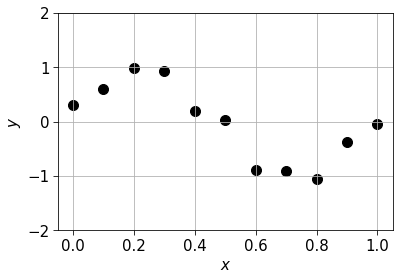

In [2]:
# Random seed to keep everything the same each time
np.random.seed(14)

# Synthetic data
X = np.linspace(0, 1, 11)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.2, size=len(X))

# Plot y vs x as a scatter plot
fig, ax = plt.subplots()
ax.scatter(X, y, color="k")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

# Setting the ylimit so high function values don't distort our plots
ax.set_ylim(-2, 2)

Here our data is 1D, and is stored in a 1D numpy array. Sklearn expects our data to be matrix-like i.e. in a 2D numpy array, so we need to do some reshaping:

In [3]:
X = X.reshape(-1, 1)
print(X.shape)

(11, 1)


With that done, let's try polynomial regression i.e. we are fitting a model $f(\mathbf{x}) =  \mathbf{w}^\top \phi({\mathbf{x}})+b$ where $\phi(x) =\begin{bmatrix}x&x^2&\dots&x^{M}\\ \end{bmatrix}^\top$ for some $M$.

Let's first look at a model for $M=3$. Fortunately, sklearn provides an easy way to produce polynomial features through [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [4]:
# Import polynomial feature transform from sklearn
from sklearn.preprocessing import PolynomialFeatures

# Create an object that lets us transform, and then apply the transformation to our data for M=3
phi = PolynomialFeatures(3, include_bias=False)
P = phi.fit_transform(X)

# Have a look at P to make sure it makes sense.
# We do not have a column of 1s as this will be included in the model bias.
print(P)

[[0.    0.    0.   ]
 [0.1   0.01  0.001]
 [0.2   0.04  0.008]
 [0.3   0.09  0.027]
 [0.4   0.16  0.064]
 [0.5   0.25  0.125]
 [0.6   0.36  0.216]
 [0.7   0.49  0.343]
 [0.8   0.64  0.512]
 [0.9   0.81  0.729]
 [1.    1.    1.   ]]


Finally, we can fit the model in only a few lines of code.

In [5]:
# Get linear regression from sklearn. It seems to be convention to import on the fly for sklearn.
from sklearn.linear_model import LinearRegression


# Create an object to represent our model. Intercept off as its already included in the features.
model = LinearRegression()

# Fit the model to our data
model.fit(P, y)

LinearRegression()

The learnt weights are stored in `model.coef_` and the learnt bias is stored in `model.intercept_`.

We can use `model.predict` to apply the model to new data.

In [11]:
# Look at coefficients
print(f"Model weights are {model.coef_}")
print(f"Model bias is {model.intercept_}")


new_data = np.array([0.11, 0.22]).reshape(-1, 1)

# Apply the model to some new data. Remember we need to transform this using phi
print(
    f"Model applied to new data [2,3] outputs {model.predict(phi.fit_transform(new_data))}"
)


Model weights are [ 4.10714721 -9.30531617 -4.26981002  1.14662586  3.9212057   4.49348256
  3.67626343  2.07746865  0.08319331 -2.07454033 -4.25996453]
Model bias is 0.3981349550754931
Model applied to new data [2,3] outputs [0.73188346 0.81118386]


Let's plot our model to see how it does.

(-1.2, 1.2)

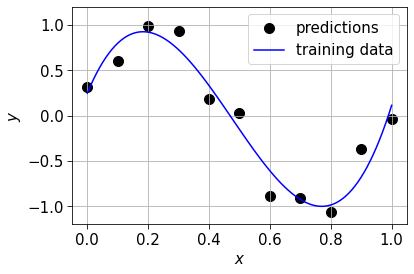

In [7]:
# Crate some dummy points for plotting and apply our model to them
X_dummy = np.linspace(0, 1, 100).reshape(-1, 1)
fx_dummy = model.predict(phi.fit_transform(X_dummy))

# Plot y vs x as a scatter plot
fig, ax = plt.subplots()
ax.scatter(X, y, color="k")

# Plot dummy points and predictions to show function
ax.plot(X_dummy, fx_dummy, color="b")

ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.legend(["predictions", "training data"])

# Setting the ylimit so high function values don't distort our plots
ax.set_ylim(-1.2, 1.2)

Let's see what the model would look like for other values of $M$. We'll produce a plot with multiple figures for $M=\{1,2,3,11\}$.

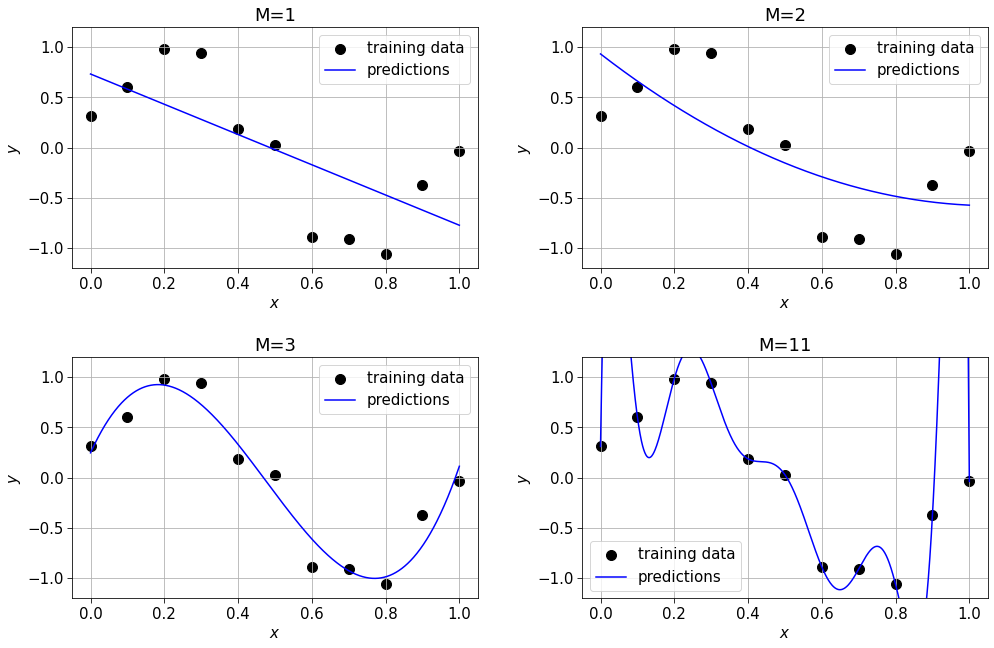

In [8]:
# Values of M we are going to try out

# Create a list to store different models
models = []

# Create a list that contains the M values to try out
M_values = [1, 2, 3, 11]


# Plot for each model
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Flattening the axes means we can index it like axes[0] axes[1] etc.
axes = axes.flatten()

# Padding to stop subplots clashing
fig.tight_layout(pad=4)

for i, m in enumerate(M_values):
    phi = PolynomialFeatures(m, include_bias=False)
    P = phi.fit_transform(X)
    model = LinearRegression().fit(P, y)

    # Make dummy points and fit model to them
    x_dummy = np.linspace(0, 1, 1000).reshape(-1, 1)
    fx_dummy = model.predict(phi.fit_transform(x_dummy))

    # Plot y vs x as a scatter plot
    axes[i].scatter(X, y, color="k")

    # Plot predictions as a curve
    axes[i].plot(x_dummy, fx_dummy, color="b")

    axes[i].grid()
    axes[i].set_xlabel("$x$")
    axes[i].set_ylabel("$y$")
    axes[i].legend(["training data", "predictions"])
    axes[i].set_title(f"M={M_values[i]}")
    axes[i].set_ylim(-1.2, 1.2)

The $M=1$ and $M=2$ models does not have the capacity to fit the function. They have *underfitted*. In contrast, the $M=11$ model has  overfit to the noisy data points.  

In this particular example, the $M=3$ model looks like the best fit; it does appear almost sinusoidal. However, it only has 4 parameters. There will exist more complicated functions where we will need more!

### Linear regression with regularisation



We want our model to have sufficient capacity to represent the function we care about, however the capacity in question is rarely obvious! What we could do is use a high capacity model to avoid underfitting, and then **regularise** this model to reduce the risk of overfitting. This is done by adding a regularisation term to our loss function. If this penalises the L2 norm of our weights then we call the whole thing "ridge regression".

$$L_{ridge}(\mathbf{w}) = \underbrace{\lVert \mathbf{y}-\mathbf{\Phi w}\rVert^2  }_{SE} +\underbrace{ \lambda  \lVert \mathbf{w}\rVert^2 }_{regularisation}$$

The $\mathbf{w}$ that minimises this is $\mathbf{w} = (\mathbf{\Phi}^\top\mathbf{\Phi}+\lambda I)^{-1}\mathbf{\Phi}^\top\mathbf{y}$. Recall from the lecture that we don't regularise the bias parameter - sklearn won't either!

Let's perform ridge regression to regularise a model for $M=11$. We can see from above that without regularisation it overfits badly.

We can again use sklearn to do this with its [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) class. The main difference here is that in sklearn the regularisation coefficent is refered to as `alpha` instead of $\lambda$. 

In [9]:
# Ridge regression model from sklearn
from sklearn.linear_model import Ridge

# M=11 model
phi = PolynomialFeatures(11, include_bias=False)
P = phi.fit_transform(X)
model = LinearRegression().fit(P, y)

# Fit model
model = Ridge(alpha=0.001)
model.fit(P, y)

Ridge(alpha=0.001)

(-1.2, 1.2)

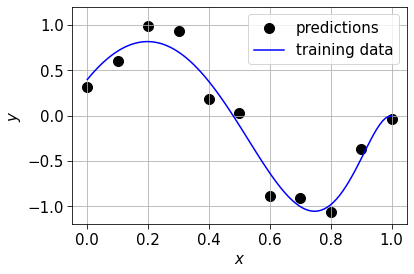

In [10]:
# Crate some dummy points for plotting and apply our model to them
X_dummy = np.linspace(0, 1, 100).reshape(-1, 1)
fx_dummy = model.predict(phi.fit_transform(X_dummy))

# Plot y vs x as a scatter plot
fig, ax = plt.subplots()
ax.scatter(X, y, color="k")

# Plot dummy points and predictions to show function
ax.plot(X_dummy, fx_dummy, color="b")

ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.legend(["predictions", "training data"])

# Setting the ylimit so high function values don't distort our plots
ax.set_ylim(-1.2, 1.2)

We can see that our regularised model closer resembles the original function. Sklearn also provides functionality for [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) regression, which you will use in the lab.

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-23